Replicate Policy Impact in KW94 page 667:
"a 500 dollar per-perod subsidy assuming data set one paramters increases schooling by 1.44 periods"

In [1]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import respy as rp

from python.mc_uncertainty_propagation import *
from python.model_wrapper import model_wrapper_kw_94
from python.cov_matrix import create_cov_matrix
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)
params

value  \
category    name                                  
delta       delta                        0.9500   
wage_a      constant                     9.2100   
            exp_edu                      0.0380   
            exp_a                        0.0330   
            exp_a_square                -0.0005   
            exp_b                        0.0000   
            exp_b_square                 0.0000   
wage_b      constant                     8.4800   
            exp_edu                      0.0700   
            exp_b                        0.0670   
            exp_b_square                -0.0010   
            exp_a                        0.0220   
            exp_a_square                -0.0005   
nonpec_edu  constant                     0.0000   
            at_least_twelve_exp_edu      0.0000   
            not_edu_last_period      -4000.0000   
nonpec_home constant                 17750.0000   
shocks      sd_a                         0.2000   
            sd_b                         0.2500   
            sd_edu                    1500.0000   
            sd_home                   1500.0000   
            corr_b_a                     0.0000   
            corr_edu_a                   0.0000   
            corr_edu_b                   0.0000   
            corr_home_a                  0.0000   
            corr_home_b                  0.0000   
            corr_home_edu                0.0000   
meas_error  sd_a                         1.0000   
            sd_b                         1.0000   

                                                                               comment  
category    name                                                                        
delta       delta                                                      discount factor  
wage_a      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_a                                     return to same sector experience  
            exp_a_square                   return to same sector, quadratic experience  
            exp_b                                    return to other sector experience  
            exp_b_square                  return to other sector, quadratic experience  
wage_b      constant                                               log of rental price  
            exp_edu                          return to an additional year of schooling  
            exp_b                                     return to same sector experience  
            exp_b_square                   return to same sector, quadratic experience  
            exp_a                                    return to other sector experience  
            exp_a_square                  return to other sector, quadratic experience  
nonpec_edu  constant                            constant reward for choosing education  
            at_least_twelve_exp_edu        reward for going to college (tuition, etc.)  
            not_edu_last_period                        reward for going back to school  
nonpec_home constant                         constant reward of non-market alternative  
shocks      sd_a                     Element 1,1 of standard-deviation/correlation ...  
            sd_b                     Element 2,2 of standard-deviation/correlation ...  
            sd_edu                   Element 3,3 of standard-deviation/correlation ...  
            sd_home                  Element 4,4 of standard-deviation/correlation ...  
            corr_b_a                 Element 2,1 of standard-deviation/correlation ...  
            corr_edu_a               Element 3,1 of standard-deviation/correlation ...  
            corr_edu_b               Element 3,2 of standard-deviation/correlation ...  
            corr_home_a              Element 4,1 of standard-deviation/correlation ...  
            corr_home_b              Element 4,2 of stand

In [3]:
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
p = pd.Series(data=df["true"].values, index=df["parameter"].values)
ds1 = transform_params_kw94_respy(p)
ds1

category     name                   
delta        delta                          0.9500
wage_a       constant                       9.2100
             exp_edu                        0.0380
             exp_a                          0.0330
             exp_a_square                  -0.0005
             exp_b                          0.0000
             exp_b_square                  -0.0000
wage_b       constant                       8.4800
             exp_edu                        0.0700
             exp_b                          0.0670
             exp_b_square                  -0.0010
             exp_a                          0.0220
             exp_a_square                  -0.0005
nonpec_edu   constant                       0.0000
             at_least_twelve_exp_edu       -0.0000
             not_edu_last_period        -4000.0000
nonpec_home  constant                   17750.0000
shocks       sd_a                           0.2000
             sd_b                           0

## Check convergence behavior for DS1

In [4]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [5]:
# qois differ partly about 0.03 from rp.replication due to bootstrap deletion.

# compute expected qoi via respy.
expected_qoi_respy = model_wrapper_kw_94(params["value"].to_numpy())
expected_qoi_respy

1.5417499999999986

In [6]:
# compute expected qoi via csv and transform function.
# For Dataset 3, values are slightly different because shocks are computed slightly differently.
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
params_csv_temp = pd.Series(data=df["true"].values, index=df["parameter"].values)
params_csv = transform_params_kw94_respy(params_csv_temp)
expected_qoi_csv = model_wrapper_kw_94(params_csv.to_numpy())
expected_qoi_csv 

1.5417499999999986

In [7]:
cov_df = create_cov_matrix()

In [8]:
# get mean vector from KW94 table4.1 vector. 
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
mean = pd.Series(data=df["true"].values, index=df["parameter"].values)

In [9]:
# qoi = mc_uncertainty_propagation(mean, cov_df, 100, save_json=True)

In [10]:
with open('json/qoi.json') as json_file:
    qoi_json = json.load(json_file)

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

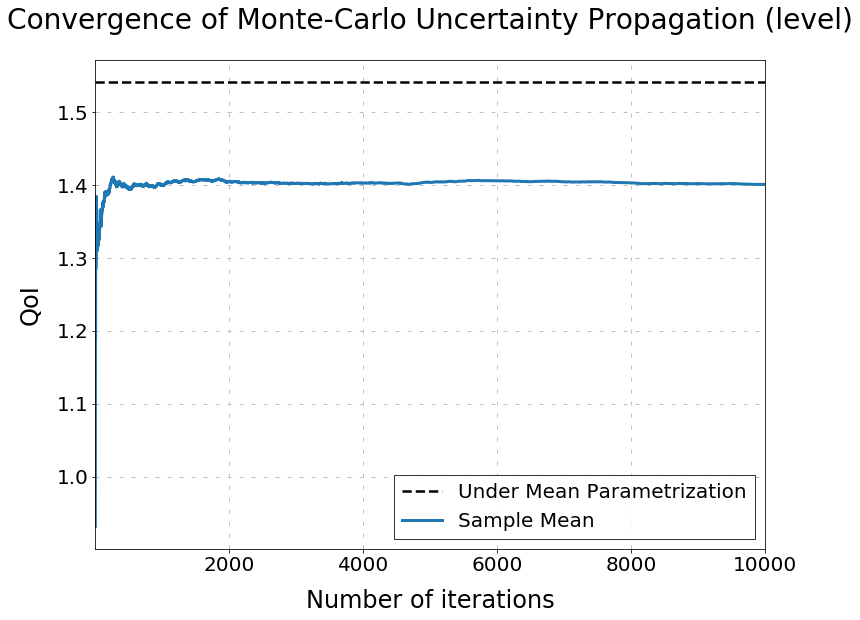

In [11]:
convergence_plot(qoi_json, expected_qoi_csv, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

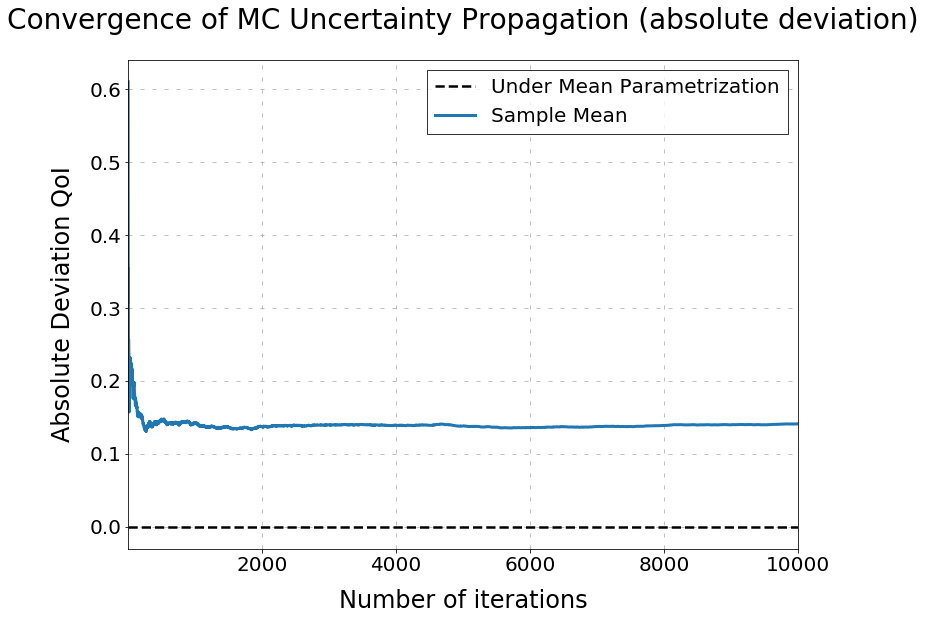

In [12]:
convergence_plot(qoi_json, expected_qoi_csv, "Absolute Deviation QoI", absolute_deviation=True)

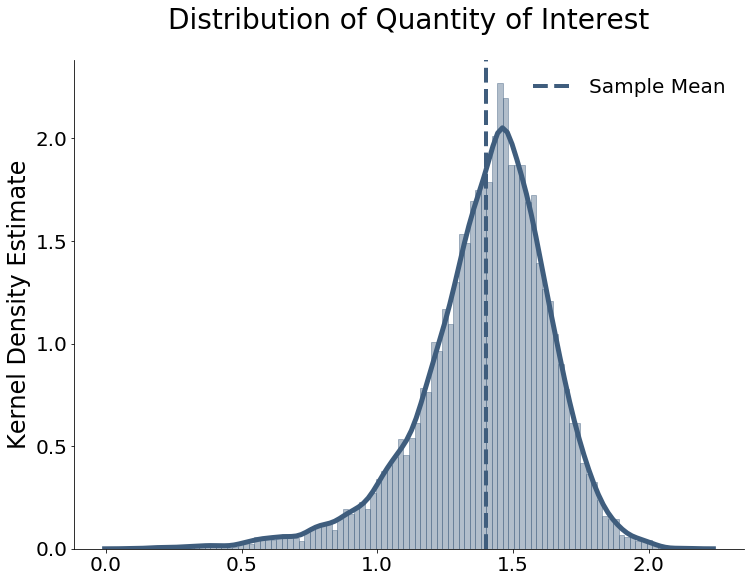

In [13]:
distplot(qoi_json)

In [14]:
np.mean(qoi_json)

1.400759675